In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

dataset = xr.open_dataset("chirps-v2_monthly_africa_2.5.nc",engine='netcdf4')

/home/chris/miniconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(dataset)

<xarray.Dataset> Size: 199MB
Dimensions:    (time: 519, latitude: 320, longitude: 300)
Coordinates:
  * latitude   (latitude) float32 1kB -39.87 -39.62 -39.37 ... 39.38 39.62 39.87
  * longitude  (longitude) float32 1kB -19.88 -19.63 -19.38 ... 54.62 54.88
  * time       (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2024-03-01
Data variables:
    precip     (time, latitude, longitude) float32 199MB ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/p

In [3]:
First_period = slice('1980-01','2000-12')
Second_period = slice('2000-01','2020-12')
OND = [10,11,12]
MAM = [3,4,5]

In [4]:
def mean_function(data,months,period):
    filtered_data = data.sel(time=data['time.month'].isin(months)).sel(time=period)
    seasonal_averages = filtered_data['precip'].groupby('time.year').mean('time')
    return seasonal_averages.mean('year')

def stdDev_function(data,months,period):
    filtered_data = data.sel(time=data['time.month'].isin(months)).sel(time=period)
    seasonal_stdDev = filtered_data['precip'].groupby('time.year').std('time')
    return seasonal_stdDev.mean('year')

def plot_function(data,title=None):
    plt.figure(figsize=(4,2))
    data.plot(cmap='gist_earth_r')
    plt.title(title)
    plt.show()

In [5]:
OND_mean_1980_2000= mean_function(dataset,OND,First_period)
MAM_mean_1980_2000= mean_function(dataset,MAM,First_period)

OND_mean_2000_2020= mean_function(dataset,OND,Second_period)
MAM_mean_2000_2020= mean_function(dataset,MAM,Second_period)

In [6]:
OND_stdDev_1980_2000= stdDev_function(dataset,OND,First_period)
MAM_stdDev_1980_2000= stdDev_function(dataset,MAM,First_period)

OND_stdDev_2000_2020= stdDev_function(dataset,OND,Second_period)
MAM_stdDev_2000_2020= stdDev_function(dataset,MAM,Second_period)

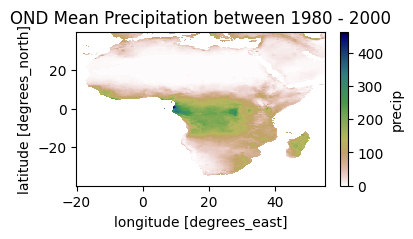

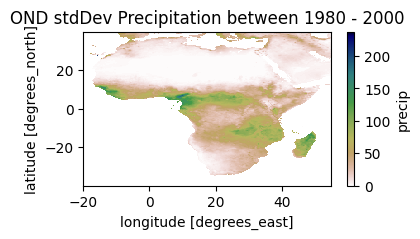

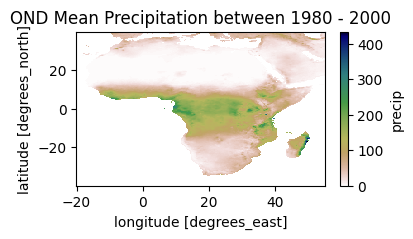

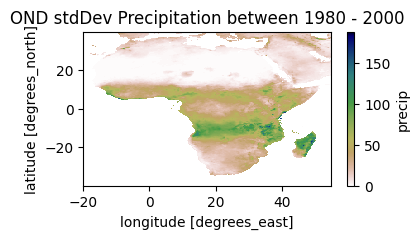

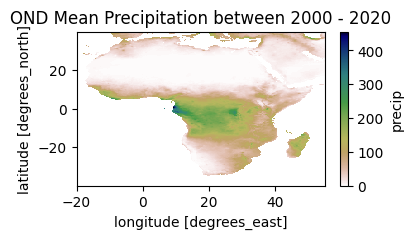

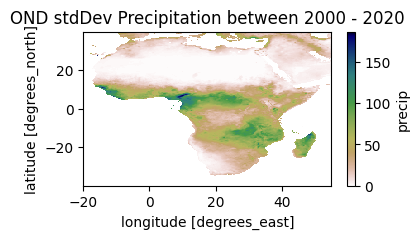

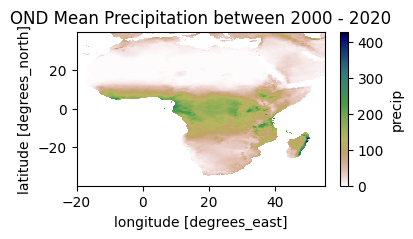

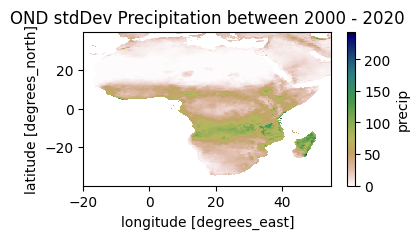

In [7]:
plot_function(OND_mean_1980_2000,title='OND Mean Precipitation between 1980 - 2000')
plot_function(OND_stdDev_1980_2000,title='OND stdDev Precipitation between 1980 - 2000')

plot_function(MAM_mean_1980_2000,title='OND Mean Precipitation between 1980 - 2000')
plot_function(MAM_stdDev_1980_2000,title='OND stdDev Precipitation between 1980 - 2000')

plot_function(OND_mean_2000_2020,title='OND Mean Precipitation between 2000 - 2020')
plot_function(OND_stdDev_2000_2020,title='OND stdDev Precipitation between 2000 - 2020')

plot_function(MAM_mean_2000_2020,title='OND Mean Precipitation between 2000 - 2020')
plot_function(MAM_stdDev_2000_2020,title='OND stdDev Precipitation between 2000 - 2020')


In [8]:
def calculate_average(data,months,period):
    filtered_data = data.sel(time=data['time.month'].isin(months)).sel(time=period)
    seasonal_averages = data['precip'].groupby('time.year').mean('time')
    return seasonal_averages

In [9]:
seasonal_averages_MAM_1980_2000=calculate_average(dataset,MAM,period=First_period)
seasonal_averages_OND_1980_2000=calculate_average(dataset,OND,period=First_period)
seasonal_averages_MAM_2000_2020=calculate_average(dataset,MAM,period=Second_period)
seasonal_averages_OND_2000_2020=calculate_average(dataset,OND,period=Second_period)



In [10]:
def calculate_trends(seasonal_averages):
    trend_map = np.zeros((len(seasonal_averages.latitude), len(seasonal_averages.longitude)))
    significant_regions = np.zeros((len(seasonal_averages.latitude), len(seasonal_averages.longitude)))
    
    for lat in range(len(seasonal_averages.latitude)):
        for lon in range(len(seasonal_averages.longitude)):
            y = seasonal_averages[:, lat, lon].values
            x = np.arange(len(y))
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            trend_map[lat, lon] = slope
            
            significant = p_value < 0.05
            significant_regions[lat, lon] = significant
    
    return trend_map, significant_regions



In [11]:
trend_map_MAM_1980_2000 , significant_map_MAM_1980_2000  = calculate_trends(seasonal_averages_MAM_1980_2000)
trend_map_MAM_1980_2000 , significant_map_OND_1980_2000  = calculate_trends(seasonal_averages_OND_1980_2000)
trend_map_MAM_2000_2020 , significant_map_MAM_2000_2020  = calculate_trends(seasonal_averages_MAM_2000_2020)
trend_map_OND_2000_2020 , significant_map_OND_2000_2020  = calculate_trends(seasonal_averages_OND_2000_2020)

In [14]:
def plot_trend(trend_map,significant_regions, season, period_name):
    
    plt.figure(figsize=(6, 6))
    plt.imshow(trend_map, cmap='RdBu_r', extent=[dataset.longitude.min(), dataset.longitude.max(), dataset.latitude.min(), dataset.latitude.max()], origin='lower')
    plt.colorbar(label='Trend (mm/year)')
    
    plt.contourf(significant_regions, levels=[0.5, 1], hatches=['...'], colors='none', extent=[dataset.longitude.min(), dataset.longitude.max(), dataset.latitude.min(), dataset.latitude.max()])
    plt.title(f'{season} precipitation trend ({period_name})')
    plt.show()

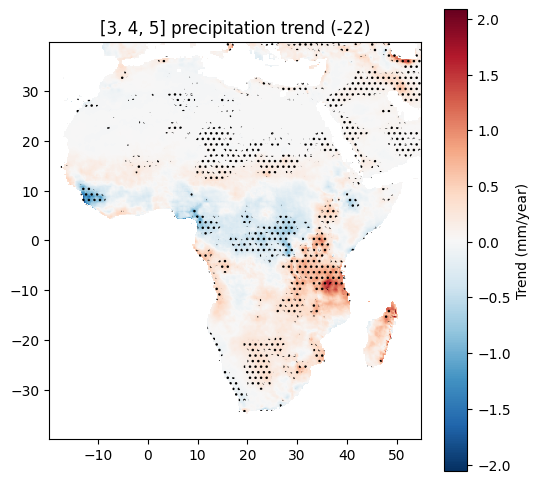

In [15]:
plot_trend(trend_map_MAM_1980_2000,significant_map_MAM_1980_2000,MAM,1998-2020)
